In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

train_data = pd.read_csv("train.csv")

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
# Dropping useless columns (Not given useful information to analyze statistically)

train_data.drop(columns=['PassengerId','Name', 'Ticket'], inplace = True)

# Descriptive Analysis

In [63]:
train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [64]:
# Central tendency and dispersion measures
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
# From this it seems Cabin isn't a useful column, later on in the inferential analysis we'll explore its relevance to achieve a good model
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [66]:
# Number survivors and no survivors 

train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [67]:
print(set(train_data['Pclass'])) 
print(set(train_data['Sex'])) 
print(set(train_data['SibSp'])) 
print(set(train_data['Parch'])) 
print(set(train_data['Embarked']))
print(set(train_data['Cabin']))

{1, 2, 3}
{'male', 'female'}
{0, 1, 2, 3, 4, 5, 8}
{0, 1, 2, 3, 4, 5, 6}
{'C', 'S', 'Q', nan}
{'B22', 'E101', 'C85', 'D20', 'B58 B60', 'D46', 'C118', 'A19', 'C92', 'C93', 'B49', 'E33', 'C110', 'D', 'E49', 'B94', 'B39', 'D49', 'C82', 'C125', 'C45', 'C103', 'A24', 'B42', 'F4', 'T', 'C111', 'C83', nan, 'D11', 'D28', 'E68', 'C22 C26', 'C86', 'E40', 'B96 B98', 'C47', 'F33', 'G6', 'C50', 'D36', 'D7', 'C7', 'D33', 'C68', 'C65', 'A23', 'E58', 'C46', 'A31', 'B57 B59 B63 B66', 'C95', 'B19', 'B38', 'B41', 'B101', 'B4', 'B37', 'B50', 'A32', 'D56', 'C128', 'A34', 'E10', 'B51 B53 B55', 'E25', 'B3', 'D35', 'D19', 'B71', 'B35', 'C49', 'B86', 'D6', 'D26', 'B78', 'A6', 'E50', 'B20', 'D47', 'C2', 'B73', 'D50', 'C123', 'C54', 'D10 D12', 'A16', 'C32', 'C78', 'D37', 'B69', 'C91', 'C126', 'E38', 'C124', 'A26', 'F38', 'C87', 'A7', 'F E69', 'B79', 'D9', 'B28', 'F2', 'C99', 'E8', 'C106', 'E44', 'C23 C25 C27', 'E12', 'E63', 'B77', 'C52', 'D17', 'C90', 'F G63', 'A5', 'E77', 'E17', 'A14', 'D30', 'E46', 'B80', 'E24

# Inferential analysis

### Categorical Variables

#### Pclass (ordinal)

<Axes: xlabel='Survived'>

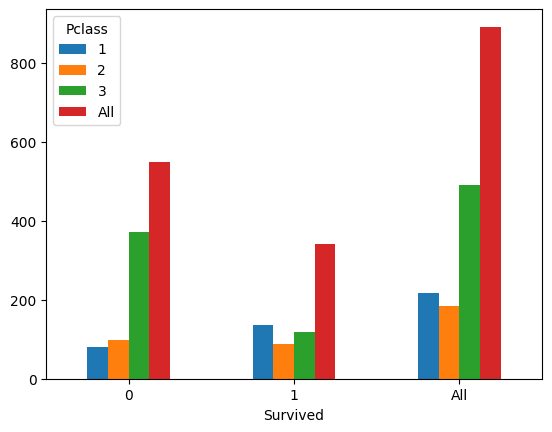

In [68]:
table1 = pd.crosstab(train_data["Survived"], train_data['Pclass'],  margins = True)
stat, p, dof, expected = chi2_contingency(table1)
table1.plot.bar(rot = 0)

In [69]:

if p < 0.05:
    print("Pclass and survided variables are associated by chi-square test, p-value is: ", p)
else:
    print("Pclass and survided variables aren't associated by chi-square test, p-value is: ", p)
    train_data.drop(columns = "Pclass", inplace = True)

Pclass and survided variables are associated by chi-square test, p-value is:  6.258462423531468e-20


#### Sex

<Axes: xlabel='Survived'>

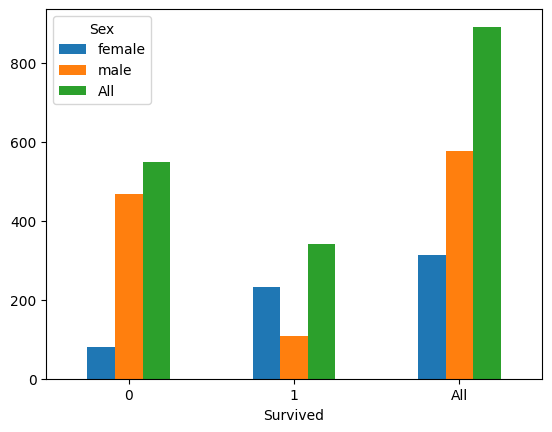

In [70]:
table2 = pd.crosstab(train_data["Survived"], train_data['Sex'],  margins = True)
stat, p, dof, expected = chi2_contingency(table2)
table2.plot.bar(rot = 0)

In [71]:
if p < 0.05:
    print("Sex and survided variables are associated by chi-square test, p-value is: ", p)
else:
    print("Sex and survided variables aren't associated by chi-square test, p-value is: ", p)
    train_data.drop(columns = "Sex", inplace = True)

Sex and survided variables are associated by chi-square test, p-value is:  1.0036732821369115e-55


#### SibSp

<Axes: xlabel='Survived'>

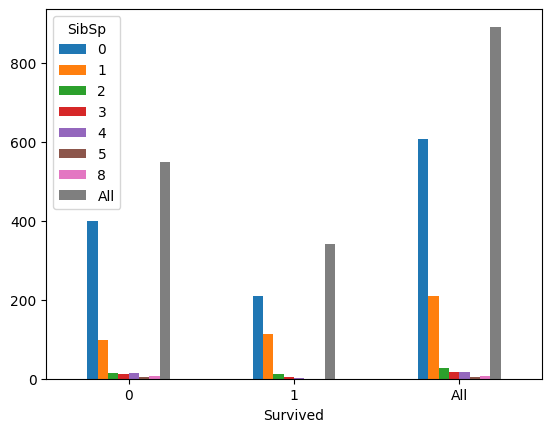

In [72]:
table3 = pd.crosstab(train_data["Survived"], train_data['SibSp'],  margins = True)
stat, p, dof, expected = chi2_contingency(table3)
table3.plot.bar(rot = 0)

In [73]:
if p < 0.05:
    print("SibSp and survided variables are associated by chi-square test, p-value is: ", p)
else:
    print("SibSp and survided variables aren't associated by chi-square test, p-value is: ", p)
    train_data.drop(columns = "SibSp", inplace = True)

SibSp and survided variables are associated by chi-square test, p-value is:  0.0006709654974933448


#### Parch

<Axes: xlabel='Survived'>

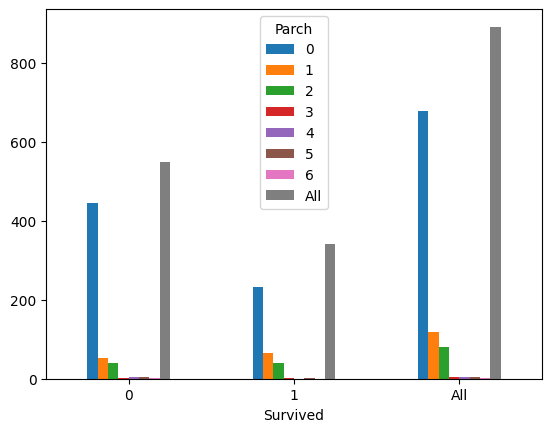

In [74]:
table4 = pd.crosstab(train_data["Survived"], train_data['Parch'],  margins = True)
stat, p, dof, expected = chi2_contingency(table4)
table4.plot.bar(rot = 0)

In [75]:
if p < 0.05:
    print("Parch and survided variables are associated by chi-square test, p-value is: ", p)
else:
    print("Parch and survided variables aren't associated by chi-square test, p-value is: ", p)
    train_data.drop(columns = "Parch", inplace = True)

Parch and survided variables are associated by chi-square test, p-value is:  0.014554047586837711


#### Embarked

<Axes: xlabel='Survived'>

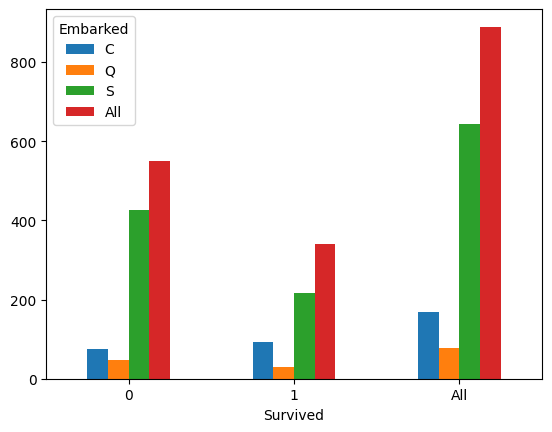

In [76]:
table5 = pd.crosstab(train_data["Survived"], train_data['Embarked'],  margins = True)
stat, p, dof, expected = chi2_contingency(table5)
table5.plot.bar(rot = 0)

In [77]:
if p < 0.05:
    print("Embarked and survided variables are associated by chi-square test, p-value is: ", p)
else:
    print("Embarked and survided variables aren't associated by chi-square test, p-value is: ", p)
    train_data.drop(columns = "Embarked", inplace = True)

Embarked and survided variables are associated by chi-square test, p-value is:  0.00018045058101554096


#### Cabin 

In [78]:
# Analyzing Cabin column due to its amount of null values (Objective: Analyze if it is useful for the prediction or not)

table = pd.crosstab(train_data["Survived"], train_data["Cabin"],  margins = True)
stat, p, dof, expected = chi2_contingency(table)

if p < 0.05:
    print("Cabin and survided variables are associated by chi-square test, p-value is: ", p)
else:
    print("Cabin and survided variables aren't associated by chi-square test, p-value is: ", p)
    train_data.drop(columns = "Cabin", inplace = True)

Cabin and survided variables aren't associated by chi-square test, p-value is:  0.9999999999782978


### Continuos Variables

#### Age

<Axes: xlabel='Age', ylabel='Count'>

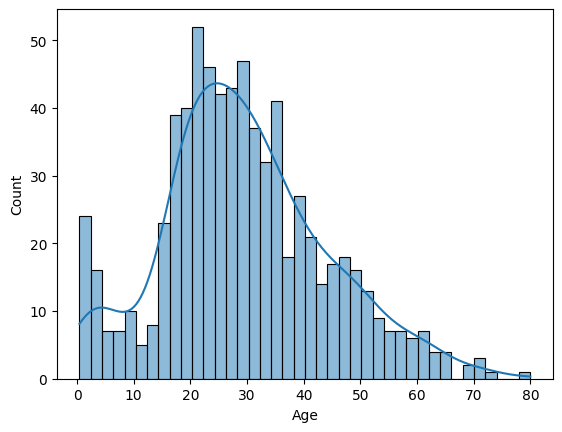

In [79]:
sns.histplot(train_data["Age"], bins = 40, kde=True)

# Graph is right skewed

<Axes: title={'center': 'Age'}, xlabel='Survived'>

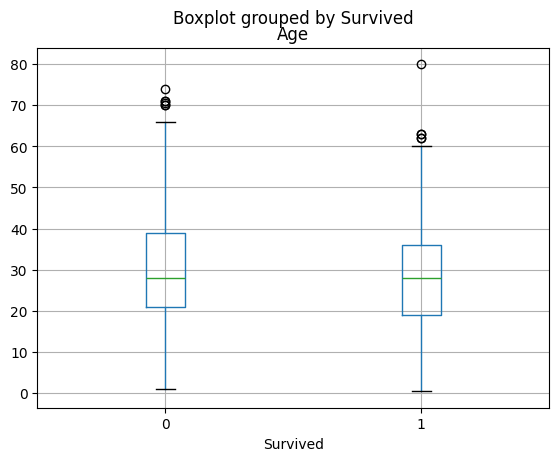

In [80]:
train_data.boxplot(column="Age", by='Survived')

# It seems not to be much correlation, given that their boxplots are very similar

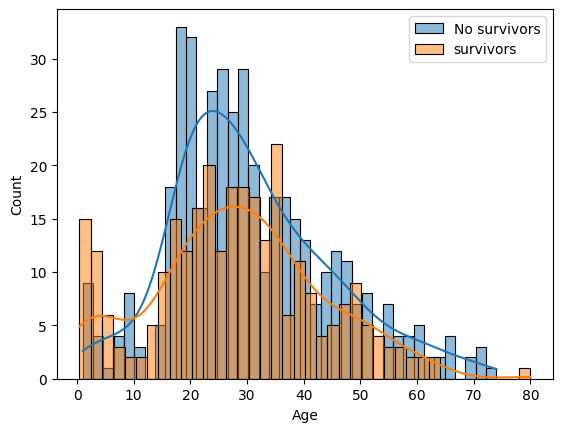

In [81]:
Age_NoSurvivors = train_data[train_data["Survived"] == 0]
Age_Survivors = train_data[train_data["Survived"] == 1]
sns.histplot(Age_NoSurvivors["Age"], bins = 40, label = "No survivors", kde=True)
sns.histplot(Age_Survivors["Age"], bins = 40, label = "survivors", kde=True)
plt.legend()
plt.show()

# Very similar graph, therefore it would be difficult to determine patterns with this variable, let's count the value above 3rd and below 1st quartiles 
# and the ones in the interquantile range (3 bins)

In [82]:
print(pd.qcut(Age_NoSurvivors["Age"], 4).value_counts())
print(pd.qcut(Age_Survivors["Age"], 4).value_counts())

Age
(0.999, 21.0]    117
(28.0, 39.0]     108
(39.0, 74.0]     102
(21.0, 28.0]      97
Name: count, dtype: int64
Age
(0.419, 19.0]    79
(36.0, 80.0]     72
(28.0, 36.0]     70
(19.0, 28.0]     69
Name: count, dtype: int64


#### Fare

<Axes: xlabel='Fare', ylabel='Count'>

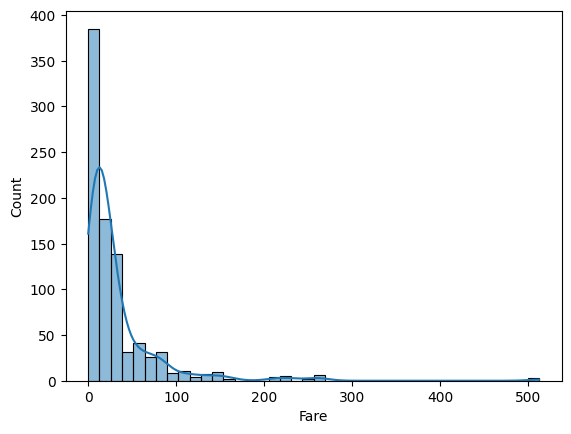

In [83]:
sns.histplot(train_data["Fare"], bins = 40, kde=True)
# Graph is right skewed

<Axes: title={'center': 'Fare'}, xlabel='Survived'>

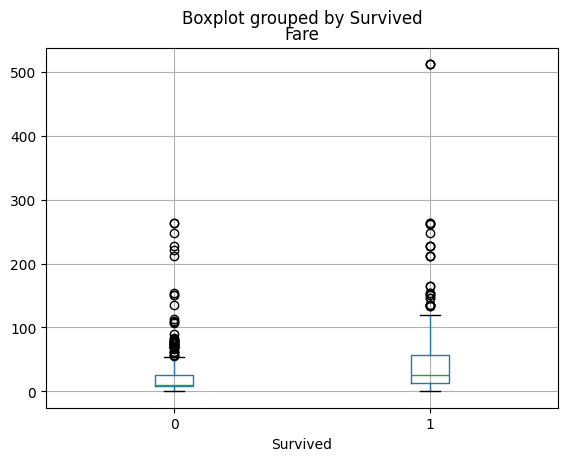

In [84]:
train_data.boxplot(column="Fare", by='Survived')

# It seems not to be much correlation, given that their boxplots are very similar

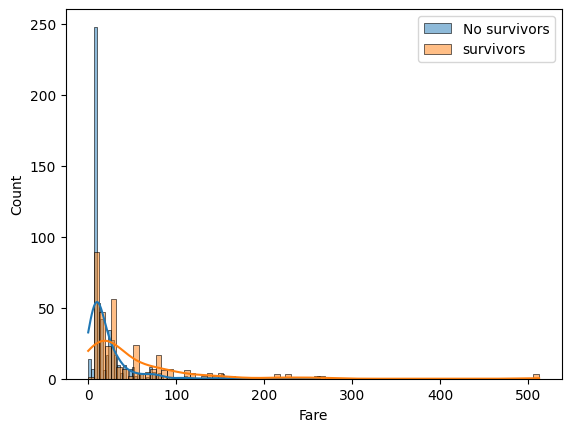

In [85]:
Fare_NoSurvivors = train_data[train_data["Survived"] == 0]
Fare_Survivors = train_data[train_data["Survived"] == 1]
sns.histplot(Age_NoSurvivors["Fare"], bins = 80, label = "No survivors", kde=True)
sns.histplot(Age_Survivors["Fare"], bins = 80, label = "survivors", kde=True)
plt.legend()
plt.show()

# Very similar graph, therefore it would be difficult to determine patterns with this variable, let's count the value above 3rd and below 1st quartiles 
# and the ones in the interquantile range (3 bins)

In [86]:
print(pd.qcut(Fare_NoSurvivors["Fare"], 4).value_counts())
print(pd.qcut(Fare_Survivors["Fare"], 4).value_counts())

Fare
(7.854, 10.5]      147
(-0.001, 7.854]    140
(10.5, 26.0]       132
(26.0, 263.0]      130
Name: count, dtype: int64
Fare
(-0.001, 12.475]    89
(12.475, 26.0]      88
(57.0, 512.329]     85
(26.0, 57.0]        80
Name: count, dtype: int64


#### variables of interest

In [87]:
train_data.drop(columns = ["Age", "Fare"], inplace = True)
train_data

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


# Predictive Analysis

In [88]:
from sklearn.preprocessing import MultiLabelBinarizer

def gender_to_bool(a):
    if a.strip() == 'male':
        return 1
    else:
        return 0

train_data["Sex"] = train_data["Sex"].apply(gender_to_bool)

train_data.dropna(subset = "Embarked", inplace = True, ignore_index = True)
binarizer = pd.get_dummies(train_data["Embarked"], dtype= int).iloc[:,0:2]
train_data = pd.concat([train_data,binarizer], axis = 1)
train_data.drop(columns = "Embarked", inplace = True)
train_data



,Survived,Pclass,Sex,SibSp,Parch,C,Q
0,0,3,1,1,0,0,0
1,1,1,0,1,0,1,0
2,1,3,0,0,0,0,0
3,1,1,0,1,0,0,0
4,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...
884,0,2,1,0,0,0,0
885,1,1,0,0,0,0,0
886,0,3,0,1,2,0,0
887,1,1,1,0,0,1,0


## Training Data

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

test_data = pd.read_csv("test.csv") # Doesn't have Survived columns  

X = train_data.iloc[:,1:]
Y = train_data["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(Y_train.shape)

clf = RandomForestClassifier(n_estimators = 150, max_depth = 6, random_state = 1)
clf.fit(X_train, Y_train)

# Relevance of each feature predicting Survived variable

importances = clf.feature_importances_
columns = X_train.columns
i = 0

while i < len(columns):
    print(f"The importante of feature '{columns[i]}' is {round(importances[i]*100,2)}%")
    i += 1

(622, 6)
(622,)


The importante of feature 'Pclass' is 20.27%
The importante of feature 'Sex' is 53.36%
The importante of feature 'SibSp' is 8.56%
The importante of feature 'Parch' is 9.88%
The importante of feature 'C' is 4.21%
The importante of feature 'Q' is 3.72%


## Test Data

(267, 6)
(267,)
The accuracy in the predictiosn is: 76.78%


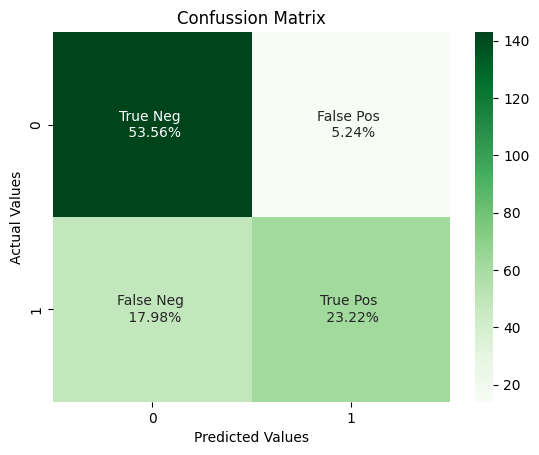

In [90]:
print(X_test.shape)
print(Y_test.shape)

predictions = clf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Goodness of prediction

print(f"The accuracy in the predictiosn is: {round(accuracy_score(Y_test, predictions)*100,2)}%")

# Check number of predictions correctly 

matrix = confusion_matrix(Y_test, predictions)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in matrix.flatten() /np.sum(matrix)]
labels = [f'{v1} \n {v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

s = sns.heatmap(matrix, annot = labels, cmap=plt.cm.Greens, fmt='')
s.set(xlabel='Predicted Values', ylabel='Actual Values', title = 'Confussion Matrix')
plt.show()

In [91]:
print(classification_report(Y_test, predictions))

# Survivors are not being predicted correctly

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       157
           1       0.82      0.56      0.67       110

    accuracy                           0.77       267
   macro avg       0.78      0.74      0.74       267
weighted avg       0.78      0.77      0.76       267

